In [1]:
## importing all requirde libraries ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
# installing the dataset
df = pd.read_csv('E:\\csv\\data.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Dataset types
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
print(np.unique( df['NObeyesdad']))

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [5]:
# Converting all the datatypes in int


le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.family_history_with_overweight=le.fit_transform(df.family_history_with_overweight)
df.FAVC=le.fit_transform(df.FAVC)
df.CAEC=le.fit_transform(df.CAEC)
df.SMOKE=le.fit_transform(df.SMOKE)
df.SCC=le.fit_transform(df.SCC)
df.CALC=le.fit_transform(df.CALC)
df.MTRANS=le.fit_transform(df.MTRANS)
df.NObeyesdad=le.fit_transform(df.NObeyesdad)

In [6]:
# New dataset
print(df)

        id  Gender        Age    Height      Weight  \
0        1       0  21.000000  1.620000   64.000000   
1        2       0  21.000000  1.520000   56.000000   
2        3       1  23.000000  1.800000   77.000000   
3        4       1  27.000000  1.800000   87.000000   
4        5       1  22.000000  1.780000   89.800000   
...    ...     ...        ...       ...         ...   
2106  2107       0  20.976842  1.710730  131.408528   
2107  2108       0  21.982942  1.748584  133.742943   
2108  2109       0  22.524036  1.752206  133.689352   
2109  2110       0  24.361936  1.739450  133.346641   
2110  2111       0  23.664709  1.738836  133.472641   

      family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  \
0                                  1     0   2.0  3.0     2      0  2.000000   
1                                  1     0   3.0  3.0     2      1  3.000000   
2                                  1     0   2.0  3.0     2      0  2.000000   
3                  

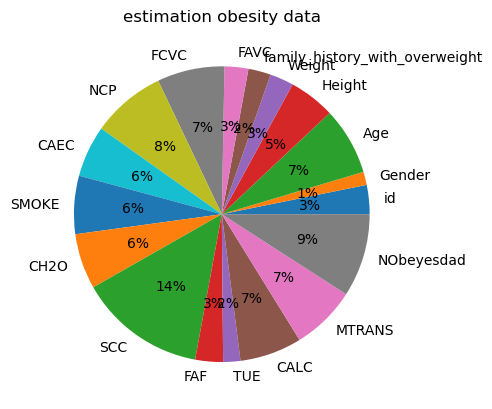

In [7]:
import matplotlib.pyplot as plt

# Data for the pie chart
categories = ['id', 'Gender', 'Age', 'Height', 'Weight','family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC','SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
scores = [2.2,1.0,5.1,3.5,1.8,1.7,1.8,5.1,5.6,3.9,4.4,4.2,9.6,2.1,1.3,4.7,4.9,6.3]  # Example scores for each category

# Plotting the pie chart
plt.pie(scores, labels=categories, autopct='%1.0f%%')

# Adding a title
plt.title('estimation obesity data')

# Displaying the chart
plt.show()


In [8]:
df.columns
selected_df=df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',]]

#independent var(Data)
X=np.asarray(selected_df)

#dependent var(target)
y=np.asarray(df['NObeyesdad'])

X.shape
y.shape

(2111,)

In [9]:
# Training the datasrt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(423,)

In [10]:
####-------------------Classification----------------###
# importing all requirde libraries and modules
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Giving Parameters to the fumctions
clf1=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
clf2=SVC(C=1.0,kernel="rbf")
clf3=GaussianNB(priors=None)
clf4=Perceptron(alpha=0,l1_ratio=0.15,max_iter=100)
clf5=DecisionTreeClassifier(criterion="gini",splitter="best", max_depth=5)


clf=[clf1,clf2,clf3,clf4,clf5]
clf_name=["kneighbors","svc","gaussionNB","perceptron","decisiontree"]

from sklearn.metrics import accuracy_score 
accuracy={}
import time 
acc={}
t={}
for model,model_name in zip(clf,clf_name):
    st=time.time()
    model.fit(X_train,y_train)                     # Fit the regressor or classifier to the training data
    pred=model.predict(X_test)                     # Make predictions on the test set
    et=time.time()
    acc[model_name]=accuracy_score(y_test,pred)
    t[model_name]=et-st

for i,j in acc.items():
    print(i,":-",j)


kneighbors :- 0.8628841607565012
svc :- 0.5602836879432624
gaussionNB :- 0.5957446808510638
perceptron :- 0.33569739952718675
decisiontree :- 0.8037825059101655


kneighbors = 0.015621185302734375
svc = 0.12539029121398926
gaussionNB = 0.016113758087158203
perceptron = 0.0
decisiontree = 0.016304731369018555


Text(0.5, 1.0, 'time comparsion')

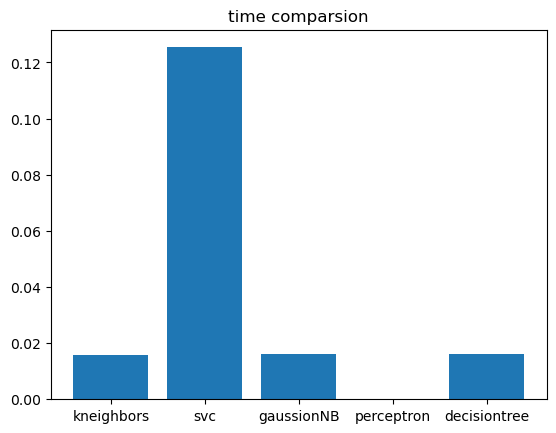

In [14]:
for i,j in t.items():
    print(i,'=',j)
plt.bar(t.keys(),t.values())
plt.title("time comparsion")


Text(0.5, 1.0, 'test accuracy comparsion')

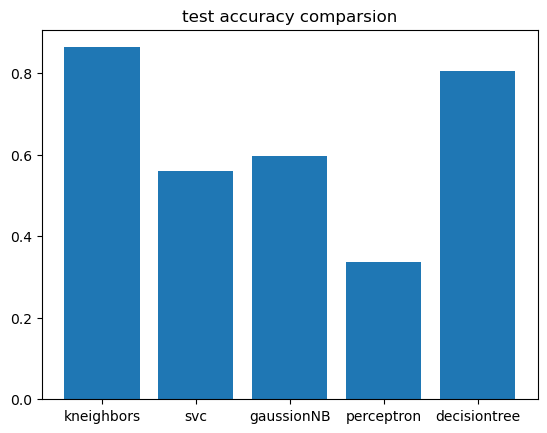

In [12]:
plt.bar(acc.keys(),acc.values())
plt.title("test accuracy comparsion")


In [13]:
####-------------------Regression----------------###
# importing all requirde libraries and modules
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Giving Parameters to the functions
Reg1=LinearRegression()
Reg2=LogisticRegression(penalty='l2',tol=0.0001,C=1.0,max_iter=10000)
Reg3=RandomForestRegressor(n_estimators=100, random_state=42)
Reg4=DecisionTreeRegressor(random_state=42)
Reg5=SVR(kernel='rbf', C=1.0, epsilon=0.1)



Reg = [Reg1,Reg2,Reg3,Reg4,Reg5]
Reg_name=['LinearRegression','LogisticRegression','RandomForestRegressor','DecisionTreeRegressor','SVR']


# Calling all the functions in for loop
for function, name in zip(Reg, Reg_name):
    print(f"\n{name}:")
    
    
    function.fit(X_train, y_train)                 # Fit the regressor or classifier to the training data
    predictions = function.predict(X_test)         # Make predictions on the test set
    if isinstance(function, LogisticRegression):
        accuracy = accuracy_score(y_test, predictions)
        print("Accuracy:", accuracy)
    else:
        mse = mean_squared_error(y_test, predictions)
        print("Mean Squared Error:", mse)
    


LinearRegression:
Mean Squared Error: 2.9304370390871686

LogisticRegression:
Accuracy: 0.7541371158392435

RandomForestRegressor:
Mean Squared Error: 0.2722404255319149

DecisionTreeRegressor:
Mean Squared Error: 0.5933806146572104

SVR:
Mean Squared Error: 2.471656885418024
